<a href="https://colab.research.google.com/github/Tooba-Af/Task-4-Data-Cleaning-and-Insight-Generation-from-Survey-Data/blob/main/Task_4_Data_Cleaning_and_Insight_Generation_from_Survey_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [62]:
import zipfile

zip_path = "/content/kaggle_survey_2017_2021.csv.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [63]:
import os
os.listdir(extract_path)


['.config',
 'top_databases.csv',
 'kaggle_survey_2017_2021.csv',
 'kaggle_ds_survey_2017_2021.txt',
 'top_ides.csv',
 'top_languages.csv',
 'top_ml_frameworks.csv',
 '.ipynb_checkpoints',
 'kaggle_survey_2017_2021.csv.zip',
 'sample_data']

In [64]:
import pandas as pd

df = pd.read_csv("/content/kaggle_survey_2017_2021.csv")  # adjust if name is different
print(df.shape)
df.head()


/tmp/ipython-input-259567090.py:3: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266

(106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.shape
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,106302,89586,105857,106207,106181,103319,99088,92786,65943,20885,...,2212,2761,1128,1022,7439,1287,1218,1186,1,629
unique,7,12778,12,10,78,13,36,21,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,394,25-29,Male,India,Masterâ€™s degree,Student,3-5 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,23926,105,23748,49178,25192,37395,21242,15995,65942,20884,...,2211,2760,1127,1021,7438,1286,1217,1185,1,628


In [66]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 4456


In [67]:
df.isna().sum().sort_values(ascending=False).head(20)


,0
Q38_B_Part_11,101845
Q34_B_Part_16,101845
Q9_Part_12,101845
Q7_Part_12,101845
Q14_Part_11,101845
Q16_Part_17,101845
Q10_Part_16,101845
Q32_B_Part_20,101845
Q19_Part_5,101845
Q18_Part_6,101845


In [68]:
# drop high missing columns
missing_ratio = df.isna().mean()
df = df.drop(columns=missing_ratio[missing_ratio > 0.8].index)

# fill categorical
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("Missing")

# fill numeric
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [69]:
# standardize case
df['Q2'] = df['Q2'].str.strip().str.lower()

# map variants
df['Q2'] = df['Q2'].replace({
    "m": "male", "man": "male", "male": "male",
    "f": "female", "woman": "female", "female": "female"
})

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_enc'] = le.fit_transform(df['Q2'])

In [71]:
# Identify programming language columns
lang_cols = [col for col in df.columns if col.startswith('Q7_Part_') or col == 'Q7_OTHER']

# Concatenate the language columns into a single series
langs = df[lang_cols].stack().reset_index(drop=True).str.strip()

# Process and count the languages
langs = langs.str.split(';').explode().str.strip()
langs.value_counts().head(5)

,count
Missing,185619
Python,65942
SQL,33090
R,20884
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,1


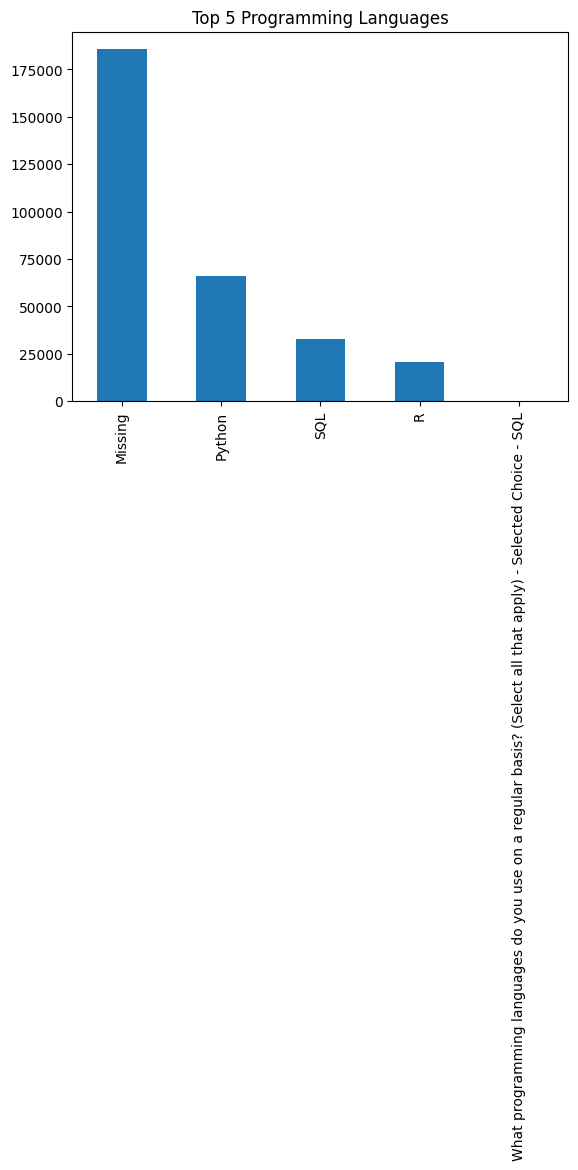

In [72]:
import matplotlib.pyplot as plt

langs.value_counts().head(5).plot(kind='bar')
plt.title("Top 5 Programming Languages")
plt.show()


In [73]:
# Find all columns about programming languages
lang_cols = [col for col in df.columns if col.startswith('Q7_Part_') or col == 'Q7_OTHER']

# Concatenate the language columns into a single series and count the occurrences
lang_counts = df[lang_cols].stack().value_counts()

# Remove the header row from the counts
lang_counts = lang_counts.drop('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice', errors='ignore')

print(lang_counts.head(10))

Missing                                                                                                         185619
Python                                                                                                           65942
SQL                                                                                                              33090
R                                                                                                                20884
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL            1
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python         1
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R              1
Name: count, dtype: int64


Missing                                                                                                      185619
Python                                                                                                        65942
SQL                                                                                                           33090
R                                                                                                             20884
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL         1
Name: count, dtype: int64


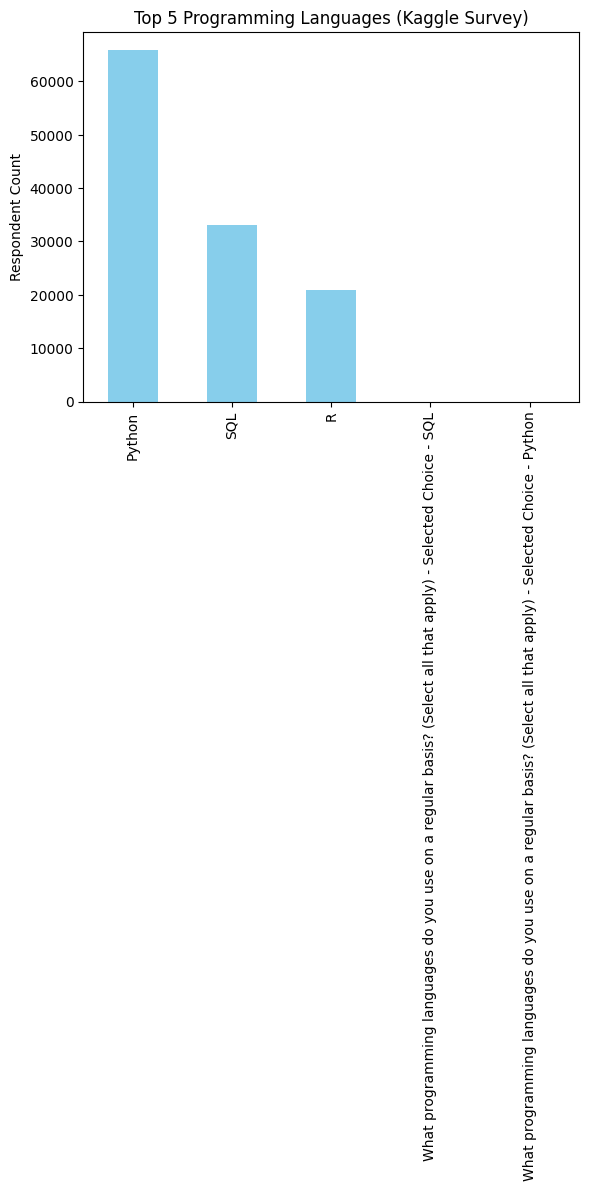

In [74]:
# 1. Identify columns related to programming languages
lang_cols = [col for col in df.columns if col.startswith('Q7_Part_') or col == 'Q7_OTHER']

# 2. Count number of respondents per language (sum of 1s)
# This approach is incorrect for this dataset structure.
# Instead, we need to count the occurrences of each language within the identified columns.

# Correct approach:
lang_counts = df[lang_cols].stack().value_counts()

# 3. Clean column names (remove long question text)
# This step is no longer needed as we are counting values, not summing columns.
# We might need to clean the language names themselves if there are variations.
# For now, we will use the counts directly.

# 4. Show top 5
print(lang_counts.head(5))

# 5. Plot
import matplotlib.pyplot as plt
lang_counts.drop('Missing', errors='ignore').head(5).plot(kind="bar", color="skyblue") # Exclude 'Missing' from the plot
plt.title("Top 5 Programming Languages (Kaggle Survey)")
plt.ylabel("Respondent Count")
plt.show()

In [75]:
# Find ML framework columns
ml_cols = [col for col in df.columns if "ml framework" in col.lower() or col.startswith('Q17_Part_') or col == 'Q17_OTHER']

In [76]:
# Count selections
ml_counts = df[ml_cols].stack().value_counts()

In [77]:
# Clean column names
ml_counts.index = ml_counts.index.str.replace("Which of the following ML frameworks do you use on a regular basis\\? \\(Select all that apply\\) - ", "", regex=True)


In [78]:
# Show top 5
print(ml_counts.head(5))

Missing                                                                                                                                              139898
Linear or Logistic Regression                                                                                                                         34635
Decision Trees or Random Forests                                                                                                                      29157
Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression            1
Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests         1
Name: count, dtype: int64


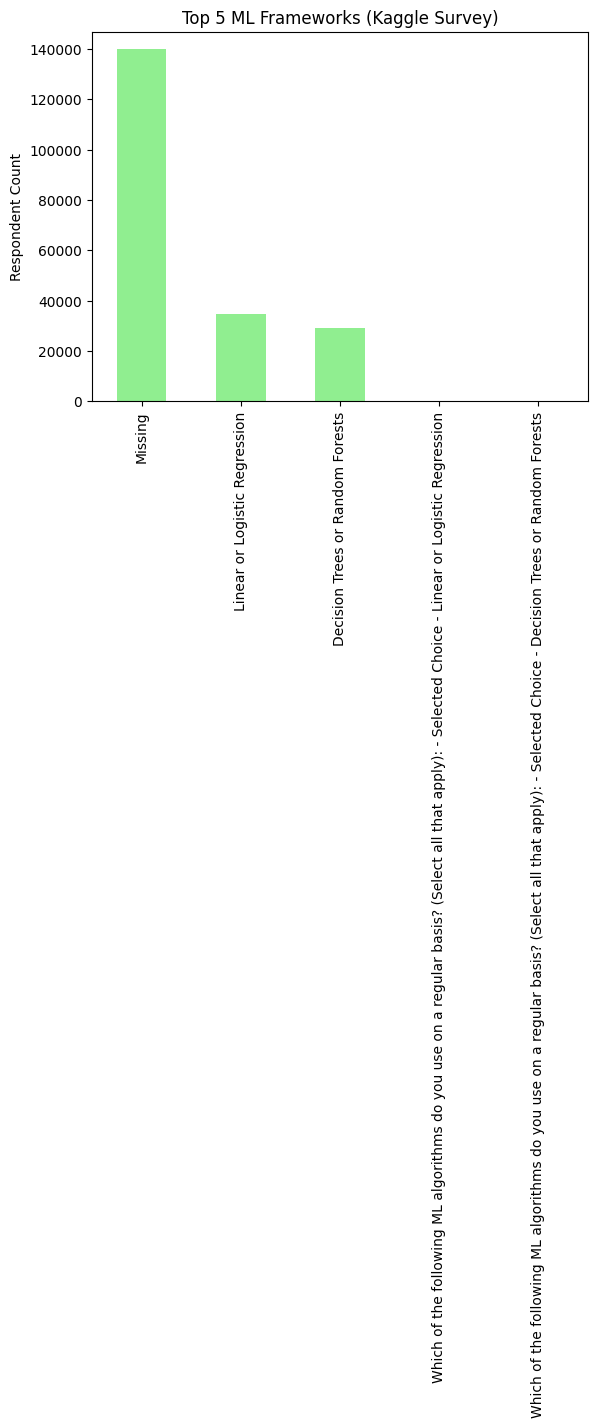

In [79]:
# Plot
ml_counts.head(5).plot(kind="bar", color="lightgreen")
plt.title("Top 5 ML Frameworks (Kaggle Survey)")
plt.ylabel("Respondent Count")
plt.show()

**Analyze IDEs / Notebooks**

Missing                                          293392
Jupyter (JupyterLab, Jupyter Notebooks, etc)      27503
 PyCharm                                          16791
Visual Studio                                     14726
Jupyter/IPython                                   14010
Name: count, dtype: int64


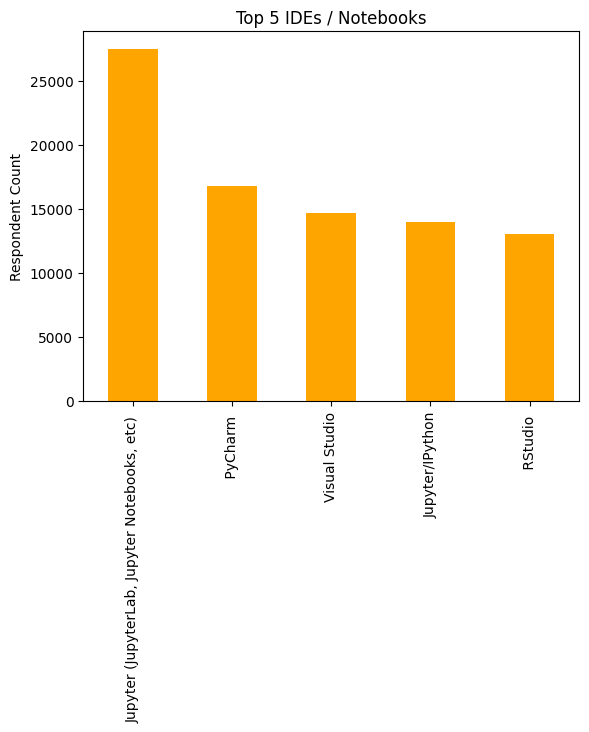

In [80]:
# Identify IDE/Notebook columns
ide_cols = [col for col in df.columns if col.startswith('Q9_Part_') or col == 'Q9_OTHER']

# Count selections
ide_counts = df[ide_cols].stack().value_counts()

# Clean column names (remove long question text)
ide_counts.index = ide_counts.index.str.replace("Which of the following integrated development environments (IDE's) do you use on a regular basis\\? \\(Select all that apply\\) - ", "", regex=True)
ide_counts.index = ide_counts.index.str.replace("Which of the following notebooks do you use on a regular basis\\? \\(Select all that apply\\) - ", "", regex=True)


print(ide_counts.head(5))

# Plot
ide_counts.drop('Missing', errors='ignore').head(5).plot(kind="bar", color="orange")
plt.title("Top 5 IDEs / Notebooks")
plt.ylabel("Respondent Count")
plt.show()

**Analyze Demographics (Single-Choice Questions)
Example: Education Level** **bold text**

Q4
Masterâ€™s degree                                                      37391
Bachelorâ€™s degree                                                    29952
Doctoral degree                                                        13146
Master's degree                                                         4933
Some college/university study without earning a bachelorâ€™s degree     4631
Name: count, dtype: int64


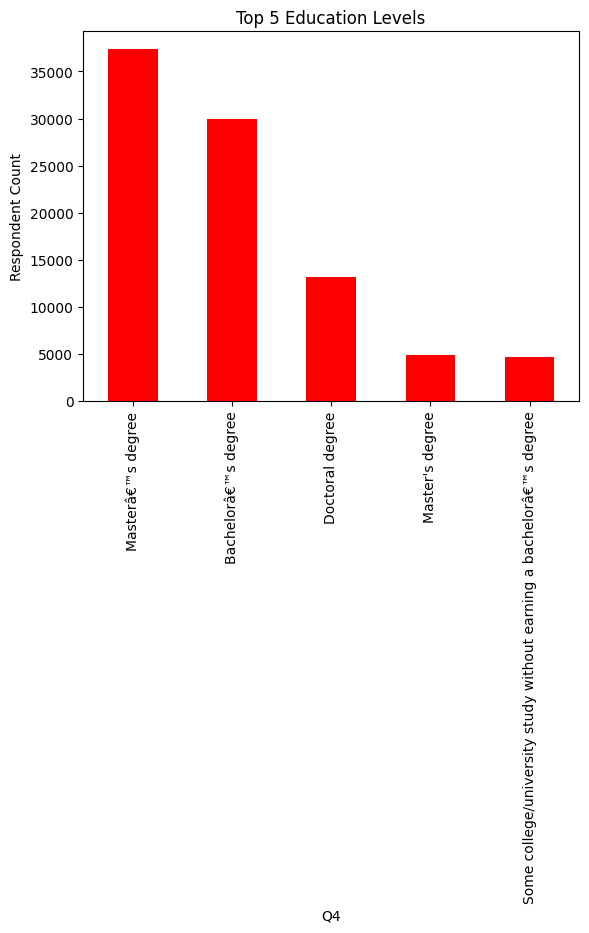

In [81]:
edu_col = 'Q4'
print(df[edu_col].value_counts().head(5))

df[edu_col].value_counts().head(5).plot(kind="bar", color="red")
plt.title("Top 5 Education Levels")
plt.ylabel("Respondent Count")
plt.show()

**Job Title**

Q5
Student              21237
Data Scientist       16167
Software Engineer    10252
Data Analyst          8267
Other                 8224
Name: count, dtype: int64


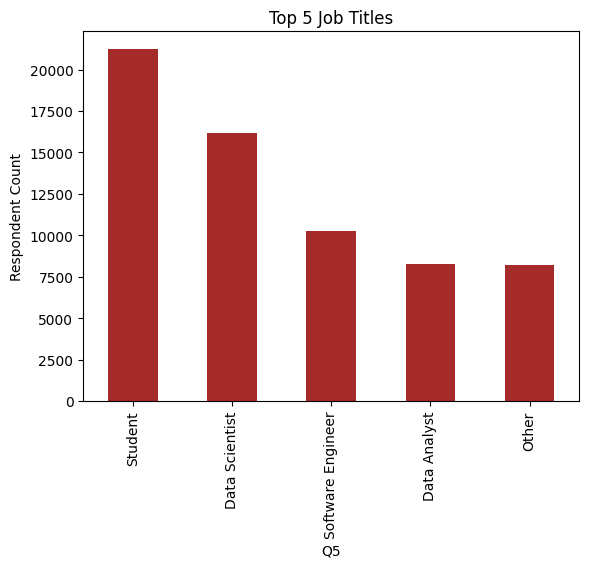

In [82]:
job_col = 'Q5'
print(df[job_col].value_counts().head(5))

df[job_col].value_counts().head(5).plot(kind="bar", color="brown")
plt.title("Top 5 Job Titles")
plt.ylabel("Respondent Count")
plt.show()

In [83]:
lang_counts.to_csv("/content/top_languages.csv")
ml_counts.to_csv("/content/top_ml_frameworks.csv")
ide_counts.to_csv("/content/top_ides.csv")
db_counts.to_csv("/content/top_databases.csv")
